Make sure DMBA package is installed

In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
from pandas.plotting import parallel_coordinates
import dmba


Colab environment detected.


In [3]:
utilities_df = dmba.load_data('Utilities.csv')
utilities_df.set_index('Company', inplace=True)

Compute Euclidean distance matrix (to compute other metrics, change the name of `metric` argument)

In [4]:
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300


In [14]:
scaler = MinMaxScaler()
utilities_df_norm = scaler.fit_transform(utilities_df)


In [15]:
utilities_df_norm = pd.DataFrame(utilities_df_norm, columns = utilities_df.columns)

In [16]:
utilities_df_norm.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,0.418919,0.311111,0.352564,0.258427,0.333333,0.408528,0.000000,0.176536
1,0.189189,0.433333,0.679487,0.455056,0.385965,0.126441,0.503984,0.689541
2,0.918919,1.000000,0.108974,0.179775,0.491228,0.418075,0.000000,0.414499
3,0.364865,0.533333,0.461538,0.348315,0.219298,0.220847,0.683267,0.216381
4,1.000000,0.266667,0.615385,0.078652,0.280702,0.000000,0.310757,0.960155


In [17]:
# utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index).head(5)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,0.585446,0.238155,1.918642e-01,0.883716,0.368913,0.575699,0.333733,0.137916,0.185439,...,0.145393,0.047606,0.465363,0.488953,0.753511,0.276065,0.313305,0.133042,0.841160,0.382025
Boston,0.585446,0.000000,0.400872,4.824861e-01,0.298696,0.461056,0.188418,0.891649,0.449592,0.524753,...,0.587802,0.625703,0.129928,0.928552,0.206786,0.434542,0.783011,0.497007,0.329524,0.379814
Central,0.238155,0.400872,0.000000,2.795528e-01,0.687406,0.169101,0.346965,0.496695,0.122531,0.309778,...,0.327140,0.262135,0.271062,0.537182,0.537356,0.071220,0.383131,0.239467,0.612891,0.150723
Commonwealth,0.191864,0.482486,0.279553,5.268356e-09,0.775870,0.447539,0.533846,0.518235,0.166439,0.042672,...,0.109654,0.238039,0.387395,0.678061,0.677011,0.346514,0.502205,0.061109,0.783784,0.424056
NY,0.883716,0.298696,0.687406,7.758695e-01,0.000000,0.709813,0.375953,1.183390,0.747164,0.817424,...,0.883192,0.923228,0.420956,1.194343,0.183985,0.708713,1.062138,0.794386,0.240227,0.630525


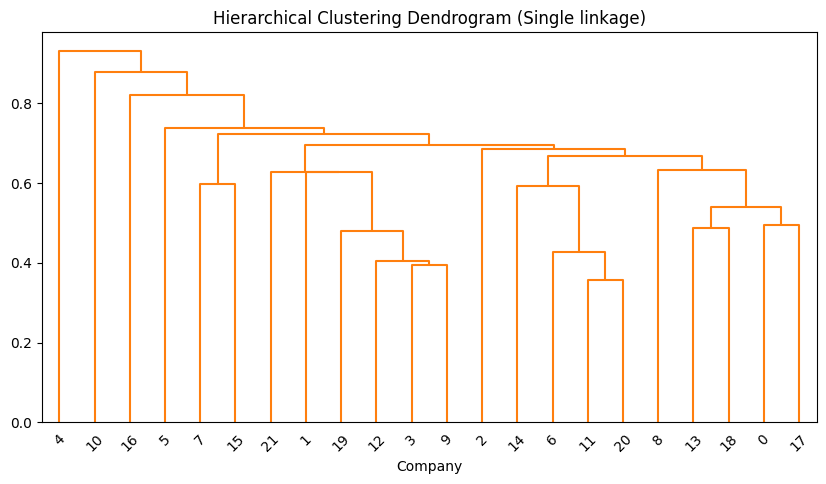

In [18]:
Z = linkage(utilities_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
plt.show()

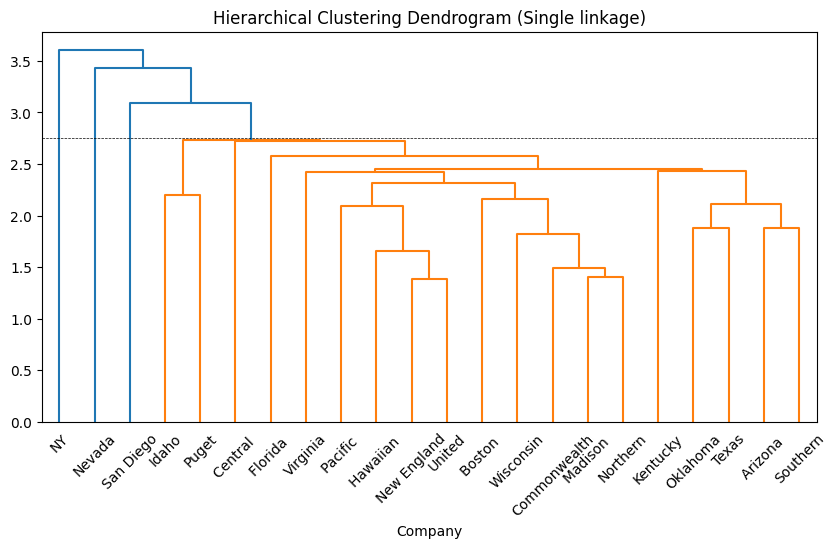

In [ ]:
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

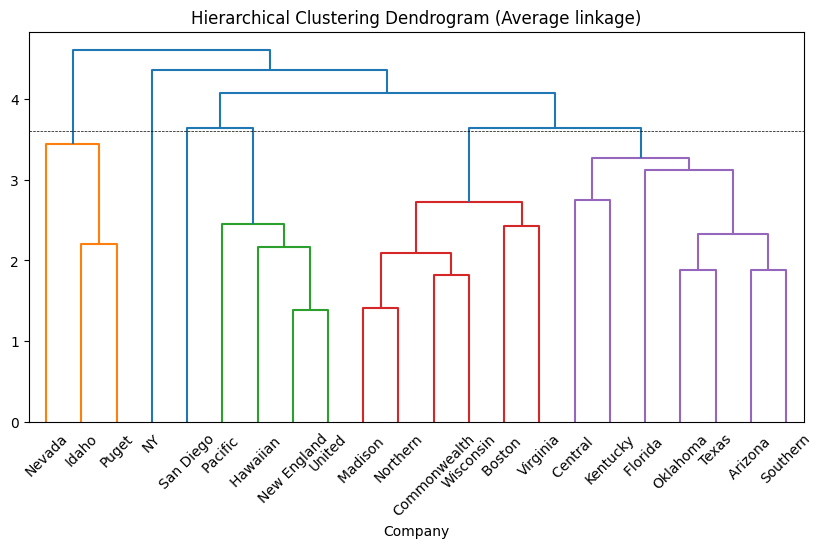

In [ ]:
Z = linkage(utilities_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [ ]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 6, criterion='maxclust')

In [ ]:
memb

array([2, 2, 3, 2, 6, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
memb = pd.Series(memb, index=utilities_df_norm.index)

In [ ]:
memb

,0
Company,
Arizona,2
Boston,2
Central,3
Commonwealth,2
NY,6
Florida,2
Hawaiian,2
Idaho,1
Kentucky,2


In [ ]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [ ]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


## K-Means

In [ ]:
# Load and preprocess data
#utilities_df = dmba.load_data('Utilities.csv')
#utilities_df.set_index('Company', inplace=True)
#utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# Normalized distance
#utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Idaho, Puget
1 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
2 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
3 :  Boston , Hawaiian , New England, Pacific , San Diego, United
4 :  Nevada
5 :  NY


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
pd.set_option('display.precision', 3)
print(centroids)

   Fixed_charge    RoR   Cost  Load_factor  Demand_growth  Sales  Nuclear  \
0         0.086 -0.529  1.950       -0.107          0.965  1.584   -0.715   
1         0.504  0.780 -0.986       -0.338         -0.490  0.352   -0.523   
2        -0.011  0.331  0.219       -0.358          0.166 -0.402    1.565   
3        -0.618 -0.625  0.202        1.148          0.056 -0.740   -0.372   
4        -1.973 -1.442  0.117       -1.228          1.045  2.402   -0.715   
5         2.037 -0.863  0.578       -1.295         -0.719 -1.581    0.214   

   Fuel_Cost  
0     -1.148  
1     -0.411  
2     -0.595  
3      1.176  
4     -0.602  
5      1.693  


In [ ]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=utilities_df_norm.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (2 members): 2.42 within cluster 
Cluster 1 (7 members): 26.51 within cluster 
Cluster 2 (5 members): 10.18 within cluster 
Cluster 3 (6 members): 21.19 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (1 members): 0.00 within cluster 


In [ ]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5
0  0.000000  3.843392  3.727036  4.108564  3.265803  5.384715
1  3.843392  0.000000  2.704121  3.298942  4.440168  4.143482
2  3.727036  2.704121  0.000000  3.251196  4.646741  3.983047
3  4.108564  3.298942  3.251196  0.000000  4.720789  3.890969
4  3.265803  4.440168  4.646741  4.720789  0.000000  6.460986
5  5.384715  4.143482  3.983047  3.890969  6.460986  0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

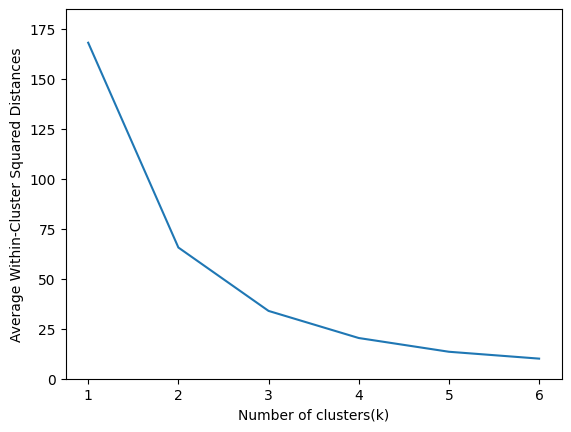

In [ ]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()